# T1 - Redes Neuronales

Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

#### Instrucciones

1. Descargar la base de datos fashion_mnist de Keras

2. Repilcar la red neuronal vista en clase con variación en los parámetros:

   * activation= 'relu', 'sigmoid' 
   * Número de capas (comience por una capa oculta y máximo dos)
   * Número de neuronas por capa
   * optimizer='sgd', 'rmsprop'
   

3. Entregar archivo .ipynb

In [1]:
# Librerías
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

from keras import models
from keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# DataSet
(X_train_image, y_train_labels), (X_test_image, y_test_labels) = fashion_mnist.load_data()


In [3]:
#shape
X_train_image.shape

(60000, 28, 28)

In [4]:
#shape
X_test_image.shape

(10000, 28, 28)

In [5]:
y_train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
y_test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

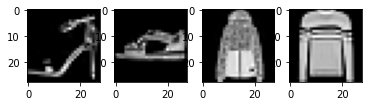

In [7]:
# Ejemplos
plt.subplot(141)
plt.imshow(X_train_image[8], cmap=plt.get_cmap('gray'))
plt.subplot(142)
plt.imshow(X_train_image[13], cmap=plt.get_cmap('gray'))
plt.subplot(143)
plt.imshow(X_train_image[22], cmap=plt.get_cmap('gray'))
plt.subplot(144)
plt.imshow(X_train_image[5], cmap=plt.get_cmap('gray'))
# show plot
plt.show()


In [8]:
# Transformacion
X_train_image = X_train_image.reshape((60000, 28 * 28))
X_train_image = X_train_image.astype('float32') / 255
X_test_image = X_test_image.reshape((10000, 28 * 28))
X_test_image = X_test_image.astype('float32') / 255

In [9]:
# Categorizar datos 
y_train_labels = to_categorical(y_train_labels)
y_test_labels = to_categorical(y_test_labels)

### MODELO 1

In [10]:
model_1 = models.Sequential()
model_1.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model_1.add(layers.Dense(10, activation='softmax'))
model_1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model_1.fit(X_train_image, y_train_labels, epochs=15, batch_size=128)

Epoch 1/15
469/469 [==============================] - 4s 7ms/step - loss: 0.5570 - accuracy: 0.8020
Epoch 2/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3806 - accuracy: 0.8590
Epoch 3/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3366 - accuracy: 0.8770
Epoch 4/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3108 - accuracy: 0.8853
Epoch 5/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2918 - accuracy: 0.8925
Epoch 6/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2767 - accuracy: 0.8984
Epoch 7/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2641 - accuracy: 0.9014
Epoch 8/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2531 - accuracy: 0.9060
Epoch 9/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2418 - accuracy: 0.9100
Epoch 10/15
469/469 [==============================] - 5s 10ms/step - loss: 0.2335 - accuracy: 0.914

In [12]:
test_loss, test_acc = model_1.evaluate(X_test_image, y_test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3538 - accuracy: 0.8898


### MODELO 2

Variando activación a Sigmoide en ambas capas y Optimizador rmsprop

In [13]:
model_2 = models.Sequential()
model_2.add(layers.Dense(512, activation='sigmoid', input_shape=(28 * 28,)))
model_2.add(layers.Dense(10, activation='sigmoid'))
model_2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model_2.fit(X_train_image, y_train_labels, epochs=15, batch_size=128)

Epoch 1/15
469/469 [==============================] - 4s 8ms/step - loss: 0.5910 - accuracy: 0.7922
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.4256 - accuracy: 0.8462
Epoch 3/15
469/469 [==============================] - 4s 10ms/step - loss: 0.3850 - accuracy: 0.8600
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3586 - accuracy: 0.8688
Epoch 5/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3394 - accuracy: 0.8752
Epoch 6/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3212 - accuracy: 0.8820
Epoch 7/15
469/469 [==============================] - 5s 10ms/step - loss: 0.3075 - accuracy: 0.8861
Epoch 8/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2947 - accuracy: 0.8911
Epoch 9/15
469/469 [==============================] - 4s 8ms/step - loss: 0.2844 - accuracy: 0.8954
Epoch 10/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2745 - accuracy: 0.89

In [15]:
test_loss, test_acc = model_2.evaluate(X_test_image, y_test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3240 - accuracy: 0.8856


### MODELO 3

Variando activación a relu y Optimizador rmsprop

In [10]:
model_3 = models.Sequential()
model_3.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model_3.add(layers.Dense(10, activation='sigmoid'))
model_3.add(layers.Dense(10, activation='sigmoid'))
model_3.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model_3.fit(X_train_image, y_train_labels, epochs=15, batch_size=128)

Epoch 1/15
469/469 [==============================] - 13s 5ms/step - loss: 1.4578 - accuracy: 0.6616
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.6837 - accuracy: 0.8397
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.4637 - accuracy: 0.8611
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3910 - accuracy: 0.8709
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3516 - accuracy: 0.8832
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3277 - accuracy: 0.8879
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3107 - accuracy: 0.8911
Epoch 8/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2976 - accuracy: 0.8954
Epoch 9/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2790 - accuracy: 0.9017
Epoch 10/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2726 - accuracy: 0.903

In [12]:
test_loss, test_acc = model_3.evaluate(X_test_image, y_test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3621 - accuracy: 0.8792


### MODELO 4

In [86]:
model_4 = models.Sequential()
model_4.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
model_4.add(layers.Dense(512, activation='sigmoid'))
model_4.add(layers.Dense(10, activation='sigmoid'))
model_4.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [87]:
model_4.fit(X_train_image, y_train_labels, epochs=15, batch_size=128)

Epoch 1/15
469/469 [==============================] - 9s 19ms/step - loss: 0.5459 - accuracy: 0.7984
Epoch 2/15
469/469 [==============================] - 10s 20ms/step - loss: 0.3758 - accuracy: 0.8598
Epoch 3/15
469/469 [==============================] - 10s 21ms/step - loss: 0.3305 - accuracy: 0.8765
Epoch 4/15
469/469 [==============================] - 10s 22ms/step - loss: 0.3033 - accuracy: 0.8856
Epoch 5/15
469/469 [==============================] - 10s 22ms/step - loss: 0.2824 - accuracy: 0.8934
Epoch 6/15
469/469 [==============================] - 10s 21ms/step - loss: 0.2665 - accuracy: 0.8997
Epoch 7/15
469/469 [==============================] - 10s 21ms/step - loss: 0.2524 - accuracy: 0.9062
Epoch 8/15
469/469 [==============================] - 10s 21ms/step - loss: 0.2398 - accuracy: 0.9096
Epoch 9/15
469/469 [==============================] - 11s 24ms/step - loss: 0.2302 - accuracy: 0.9127
Epoch 10/15
469/469 [==============================] - 10s 21ms/step - loss: 0.2214

In [88]:
test_loss, test_acc = model_4.evaluate(X_test_image, y_test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3445 - accuracy: 0.8975


### MODELO 5

In [77]:
model_5 = models.Sequential()
model_5.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model_5.add(layers.Dense(512, activation='sigmoid'))
model_5.add(layers.Dense(10, activation='sigmoid'))
model_5.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [78]:
model_5.fit(X_train_image, y_train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 4s 7ms/step - loss: 0.7384 - accuracy: 0.7311
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 0.3865 - accuracy: 0.8568
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.3372 - accuracy: 0.8744
Epoch 4/25
469/469 [==============================] - 4s 8ms/step - loss: 0.3042 - accuracy: 0.8856
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 0.2880 - accuracy: 0.8893
Epoch 6/25
469/469 [==============================] - 4s 8ms/step - loss: 0.2770 - accuracy: 0.8943
Epoch 7/25
469/469 [==============================] - 4s 9ms/step - loss: 0.2568 - accuracy: 0.9029
Epoch 8/25
469/469 [==============================] - 4s 9ms/step - loss: 0.2406 - accuracy: 0.9091
Epoch 9/25
469/469 [==============================] - 4s 9ms/step - loss: 0.2260 - accuracy: 0.9143
Epoch 10/25
469/469 [==============================] - 4s 8ms/step - loss: 0.2217 - accuracy: 0.9157

In [79]:
test_loss, test_acc = model_5.evaluate(X_test_image, y_test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4223 - accuracy: 0.8841
